# Tutorial 7-2. Sentiment Analysis
**GOAL**: Develop a sentiment classifier that determines the sentiment of documents as positive or negative.

## 1. (English) Yelp review classification


### 1-1. Load dataset

The datafile `yelp.csv` contains 10,000 reviews and its metadata (e.g., date, stars, user_id, business_id).

Seeing is better than words. Let's load the data.

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('movie_reviews_5k.csv', sep = '\t')
df

,document,label
0,"맥클레인과 그랜트는 특수부대를 이끌고 그 교회를 포위하나, 이미 탈출준비를 해 놓은...",1
1,"누구나 예상할수있는 뻔한스토리,,,,,,,",0
2,세계최고의 스토리텔러들이 모이면 심슨이 탄생한다,1
3,어제 알았네요. 이 영화. 그래도 아쉽긴하지만 더 좋은 작품을 만드는 힘을 가지길 ...,1
4,왜이리 어설픔....답답도 하고....,0
...,...,...
4995,정말 명작이네요..............물론 보진 않았습니다.,1
4996,드라큐라 곧 개봉예정이라 복습하러 왔습니다. 당시 컬쳐쇼크 당한 영화. 희대의 명작...,1
4997,공들인건알겠다. 근데 노잼,0
4998,4년만에 찾은 공원이 어제 구경간 곳 마냥 무덤덤,0


In [99]:
df.head()

,document,label
0,"맥클레인과 그랜트는 특수부대를 이끌고 그 교회를 포위하나, 이미 탈출준비를 해 놓은...",1
1,"누구나 예상할수있는 뻔한스토리,,,,,,,",0
2,세계최고의 스토리텔러들이 모이면 심슨이 탄생한다,1
3,어제 알았네요. 이 영화. 그래도 아쉽긴하지만 더 좋은 작품을 만드는 힘을 가지길 ...,1
4,왜이리 어설픔....답답도 하고....,0


Word cloud visualization for text reviews

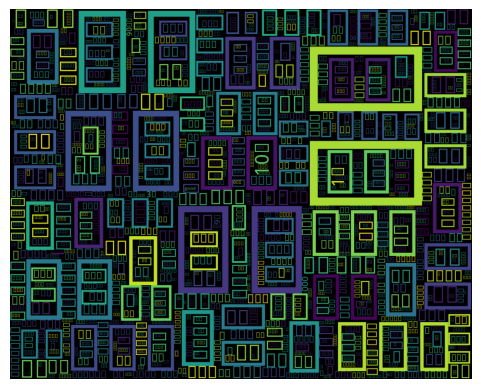

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

document = ' '.join(df.document.values) # all text documents in one string
wc = WordCloud(width=1000, height=800, max_words=1000).generate(document)
plt.imshow(wc)
plt.axis("off")
plt.show()

### 1-2. Document vectorization

We will use our friend `sklearn` package for machine learning to transform text into BOW (bag-of-words) vectors.

We have two options:
- `CountVectorizer`: return vectors having term frequencies (docuemnt [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- `TfidfVectorizer`: return vectors having Tf-Idf (term frequency-inverse docuement frequency) values (document [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html))

The code below will extract the top 1000 frequent tokens consisting of unigrams and bigrams. Stopwords are removed using the predefined stopwords likst in the `sklearn` package.

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # lowercase input text
                             stop_words='english') # remove predefined stop words for English
X_counts = count_vect.fit_transform(df['document'])

tfidf_vect = TfidfVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # convert all characters to lowercase before tokenizing
                             stop_words='english') # remove predefined stop words for English
X_tfidfs = tfidf_vect.fit_transform(df['document'])

X_counts.shape, X_tfidfs.shape

((5000, 1000), (5000, 1000))

Let's check the resulting matrix!

In [102]:
X_counts, X_tfidfs

(<5000x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 13344 stored elements in Compressed Sparse Row format>,
 <5000x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 13344 stored elements in Compressed Sparse Row format>)

Let's make them visible using pandas dataframe!
- The resulting `X_counts` and `X_tfidfs` are sparse matrices (designed for memory efficiency) with no direct access to their values. To see their values, we have to use the `.todense()` method.
- For the vectorizers, use `.get_feature_names()` method to check the extracted tokens.

In [104]:
df_bow_tf = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names_out())
df_bow_tf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_bow_tfidf = pd.DataFrame(X_tfidfs.todense(), columns=tfidf_vect.get_feature_names_out())
df_bow_tfidf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are ready to develop machine learning models for sentiment classification!

### 1-3. Develop sentiment classifiers

Here, we will develop a logistic regression, especially, Lasso!

In [108]:
X = df_bow_tfidf
y = df.label
X.shape, y.shape

((5000, 1000), (5000,))

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))

Training Accuracy: 0.8160, Fscore: 0.7937
Test Accuracy: 0.6733, Fscore: 0.6360


C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


It works pretty well, showing a high f1 score!

Let's check the positive or negative sentiment words.

In [110]:
import numpy as np

# coefficient values and their corresponding feature names
coefficient_values = clf.coef_.squeeze()
feature_names = X.columns

# get index to access the values in ascending order
args = np.argsort(coefficient_values)

In [111]:
print('top 10 negative words:')
for token, coef in zip(feature_names[args[:10]], coefficient_values[args[:10]]):
    print('{:<20}: {:.4f}'.format(token, coef))

top 10 negative words:
때문에                 : -11.4606
0점은                 : -10.4439
아깝다                 : -10.2224
에효                  : -8.8694
아니고                 : -8.6987
이유를                 : -8.6306
발연기                 : -8.6081
산으로                 : -8.5977
재미없다                : -8.3925
쓰레기                 : -8.1781


In [112]:
print('top 10 positive words:')
for token, coef in zip(feature_names[args[-10:][::-1]], coefficient_values[args[-10:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

top 10 positive words:
                싶어지는: 13.6507
                 마음에: 10.2773
                  보며: 10.0129
                 없지만: 9.5684
                  맘에: 9.1184
                  있고: 9.0240
              재미있었어요: 8.7881
                  ㄷㄷ: 8.7750
                  깊은: 8.6323
                 가슴이: 7.9468


## 2. How about for Korean documents?

`CountVectorizer` and `TfidfVectorizer` are powerful tools to convert free text documents to vectors.

However, their NLP such as tokenization or stopwords removal is only for English.

Thus, for Korean documents, we need to use **a custom tokenizer function designed for Korean**.

In [61]:
from konlpy.tag import Okt

okt = Okt()
text = document
tokens = okt.morphs(text)
print(tokens)


['맥클레인', '과', '그랜트', '는', '특수부대', '를', '이끌고', '그', '교회', '를', '포위', '하나', ',', '이미', '탈출', '준비', '를', '해', '놓은', '스튜어트', '일당', '은', '스노우', '모빌', '을', '이용', '하여', '747', '점', '보기', '가', '준비', '된', '곳', '으로', '빠져나간다', '.', '이번', '에도', '죽', '을', '뻔하다', '살아난', '맥클레인', '은', '그', '들', '이', '떨구고', '간', '총', '에', '공', '포탄', '이', '들어있는것', '잼', '~', '누구', '나', '예상', '할수있는', '뻔한', '스토리', ',,,,,,,', '세계', '최고', '의', '스토리', '텔러', '들', '이', '모이', '면', '심슨', '이', '탄생', '한다', '어제', '알았네요', '.', '이', '영화', '.', '그래도', '아쉽긴', '하지만', '더', '좋은', '작품', '을', '만드는', '힘', '을', '가지길', '원해요', '!!~^^', '왜', '이리', '어설픔', '....', '답답', '도', '하고', '....', '초반', '에는', '꽤', '흥미로운듯', '했는데', '정말', '벌것', '없다', '.', '요즘', '기준', '으로', '보면', '너무', '식상함', '.', '사랑', '한다', '.', '왕빛나', '의', '그', '무언가', '를', '바랐건만', '원치않게', '3', 'D', '로', '봤다', '.', '화가', '났다', '.', '그런데', '3', 'D', '로', '보지', '않아도', '화가', '났을것이다', '.', '진짜', '볼거', '없을', '때', '나', '킬링타임', '용', '으로', '안나', '가', '너무', '좋아', 'ㅠㅠ', '레빗', '의', '연기력', '도', '일품', '..

In [58]:
document

'맥클레인과 그랜트는 특수부대를 이끌고 그 교회를 포위하나, 이미 탈출준비를 해 놓은 스튜어트 일당은 스노우모빌을 이용하여 747 점보기가 준비된 곳으로 빠져나간다. 이번에도 죽을 뻔하다 살아난 맥클레인은 그들이 떨구고 간 총에 공포탄이 들어있는것잼~ 누구나 예상할수있는 뻔한스토리,,,,,,, 세계최고의 스토리텔러들이 모이면 심슨이 탄생한다 어제 알았네요. 이 영화. 그래도 아쉽긴하지만 더 좋은 작품을 만드는 힘을 가지길 원해요!!~^^ 왜이리 어설픔....답답도 하고.... 초반에는 꽤 흥미로운듯 했는데 정말 벌것 없다. 요즘 기준으로 보면 너무 식상함. 사랑한다. 왕빛나의 그 무언가를 바랐건만 원치않게 3D로 봤다. 화가났다. 그런데 3D로 보지 않아도 화가 났을것이다. 진짜 볼거없을때나 킬링타임용으로 안나가 너무좋아 ㅠㅠ 레빗의 연기력도 일품.. 살아야 될 이유를 찾은 아담 갈비집 이래서 절대 배우가 감독하면 안된다는 것이다. 호크가 핵위성무기 묶여 지구를 구하는데 뭔가 가슴지린 것을 전혀 표현하지 못했다, ost가 얼마나 중요한지 여실히 보요준다. 우주 영상미는 당시 시대상황에서 압권이였지만 거창하기만 하고 조지호그라는 인물표현에 밀도가 없음. 무슨내용이야? 유치찬란한 영화 정서상으로 안맞는 문화이지만 두 배우의 연기는 Brilliant~ 정말 재미없는 내용에 지루한 연출에 여배우 몸매외엔 볼게 없는 영화 저 이영화 봤는데 엄청 재밌음!그리고 3D라서 더 재미있었음! 일본 호러도 예전같지 않네.. 진짜 재미없다 ㅡㅡ;; 왜 빵점 주는건 없는거야!! 아쉬운 영화네요 .아쉽습니다. 왠만하면 참고 보는데 이건 너무한다... 호구, 삼돌이, 어떡하니 ㅠㅠ 영화를 다 보고나서 나도 모르게 캘리포니아 드림~하면서 노래를 따라 부르고 있다ㅋㅋ 양조위의 에피소드가 더 설렜던 건 누구나 한 번쯤 있었을 법한 교감이었기에 그랬던 것 같다. 뭔가 부조화가 느껴진다 우리 다같이 2.22를 만들어요 어차피 예상했었던 결말!! 야밤에 몰입하면 본게 얼마만인지...한 가장으로써 

In [80]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    # stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', "영화" ]    
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [81]:
corpus = [document]

In [82]:
corpus

['맥클레인과 그랜트는 특수부대를 이끌고 그 교회를 포위하나, 이미 탈출준비를 해 놓은 스튜어트 일당은 스노우모빌을 이용하여 747 점보기가 준비된 곳으로 빠져나간다. 이번에도 죽을 뻔하다 살아난 맥클레인은 그들이 떨구고 간 총에 공포탄이 들어있는것잼~ 누구나 예상할수있는 뻔한스토리,,,,,,, 세계최고의 스토리텔러들이 모이면 심슨이 탄생한다 어제 알았네요. 이 영화. 그래도 아쉽긴하지만 더 좋은 작품을 만드는 힘을 가지길 원해요!!~^^ 왜이리 어설픔....답답도 하고.... 초반에는 꽤 흥미로운듯 했는데 정말 벌것 없다. 요즘 기준으로 보면 너무 식상함. 사랑한다. 왕빛나의 그 무언가를 바랐건만 원치않게 3D로 봤다. 화가났다. 그런데 3D로 보지 않아도 화가 났을것이다. 진짜 볼거없을때나 킬링타임용으로 안나가 너무좋아 ㅠㅠ 레빗의 연기력도 일품.. 살아야 될 이유를 찾은 아담 갈비집 이래서 절대 배우가 감독하면 안된다는 것이다. 호크가 핵위성무기 묶여 지구를 구하는데 뭔가 가슴지린 것을 전혀 표현하지 못했다, ost가 얼마나 중요한지 여실히 보요준다. 우주 영상미는 당시 시대상황에서 압권이였지만 거창하기만 하고 조지호그라는 인물표현에 밀도가 없음. 무슨내용이야? 유치찬란한 영화 정서상으로 안맞는 문화이지만 두 배우의 연기는 Brilliant~ 정말 재미없는 내용에 지루한 연출에 여배우 몸매외엔 볼게 없는 영화 저 이영화 봤는데 엄청 재밌음!그리고 3D라서 더 재미있었음! 일본 호러도 예전같지 않네.. 진짜 재미없다 ㅡㅡ;; 왜 빵점 주는건 없는거야!! 아쉬운 영화네요 .아쉽습니다. 왠만하면 참고 보는데 이건 너무한다... 호구, 삼돌이, 어떡하니 ㅠㅠ 영화를 다 보고나서 나도 모르게 캘리포니아 드림~하면서 노래를 따라 부르고 있다ㅋㅋ 양조위의 에피소드가 더 설렜던 건 누구나 한 번쯤 있었을 법한 교감이었기에 그랬던 것 같다. 뭔가 부조화가 느껴진다 우리 다같이 2.22를 만들어요 어차피 예상했었던 결말!! 야밤에 몰입하면 본게 얼마만인지...한 가장으로써

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer)
X = vectorizer.fit_transform(corpus)
df_X = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_X

C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,가가,가게,가격,가공,가구,가기,가끔,가나,가나다,가난,...,히죽,히치콕,히히히,힐러,힐링,힐튼,힘,힙찔,힛걸,힝
0,0.001627,0.000814,0.000814,0.000814,0.000814,0.000814,0.006508,0.002441,0.000814,0.000814,...,0.000814,0.000814,0.000814,0.000814,0.005695,0.000814,0.012203,0.000814,0.004068,0.000814


Word cloud visualization for Korean
- To visualize Korean, We will use a custom font file (`NanumSquareRoundR.ttf`) since the basic font in `WordCloud` package do not support Korean.
    - Be sure to locate `NanumSquareRoundR.ttf` file in the same folder.

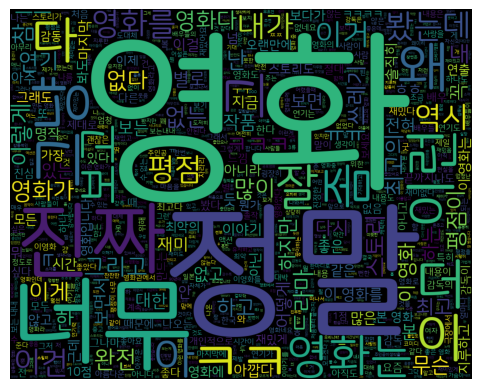

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(corpus) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate(text)
plt.savefig('wordcloud.png')
plt.imshow(wc)
plt.axis("off")
plt.show()

I also recommend to use online wordcloud generor (e.g., http://wordcloud.kr/) for convenience :)

In [89]:
df_bow_tf = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names_out())
df_bow_tf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df_bow_tfidf = pd.DataFrame(X_tfidfs.todense(), columns=tfidf_vect.get_feature_names_out())
df_bow_tfidf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X = df_bow_tfidf
y = df.sentiment
X.shape, y.shape

AttributeError: 'DataFrame' object has no attribute 'sentiment'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))

In [ ]:
import numpy as np

# coefficient values and their corresponding feature names
coefficient_values = clf.coef_.squeeze()
feature_names = X.columns

# get index to access the values in ascending order
args = np.argsort(coefficient_values)

In [ ]:
print('top 10 negative words:')
for token, coef in zip(feature_names[args[:10]], coefficient_values[args[:10]]):
    print('{:<20}: {:.4f}'.format(token, coef))

In [ ]:
print('top 10 positive words:')
for token, coef in zip(feature_names[args[-10:][::-1]], coefficient_values[args[-10:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

<Figure size 640x480 with 0 Axes>